In [198]:
!pip install apyori

In [199]:
!pip install efficient-apriori

## Packages

In [200]:
import re
import string
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

In [201]:
current_working_dir = Path('.')
current_working_dir.absolute()


PosixPath('/content')

## Load data

In [202]:
with open(current_working_dir.absolute() / 'words_250000_train.txt') as file:
    content = file.read()
    words = content.split()

len(words), words[:5]

(227300, ['aaa', 'aaaaaa', 'aaas', 'aachen', 'aaee'])

In [203]:
letters = "".join(words)
len(letters), letters[:20]

(2124746, 'aaaaaaaaaaaasaachena')

In [204]:
count_letters = Counter(letters)
# count_letters

In [205]:
count_word_len = Counter(len(word) for word in words)
# count_word_len

In [206]:
max(count_word_len.elements()), max(count_word_len)


(29, 29)

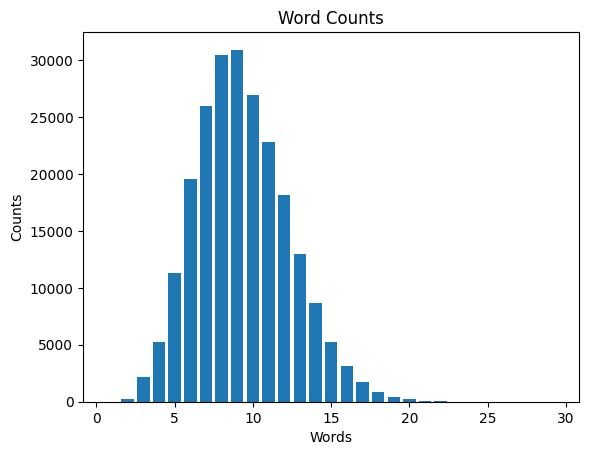

In [207]:
word_lengths = list(count_word_len.keys())
counts = list(count_word_len.values())

plt.bar(word_lengths, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Word Counts')

plt.show()

## Spliting words into train and test

In [208]:
from sklearn.model_selection import train_test_split

inx_range = np.arange(int(len(words)))
train_inx, test_inx = train_test_split(inx_range, test_size=0.2, random_state=42)
train_inx.shape, test_inx.shape

((181840,), (45460,))

In [209]:
train_inx

array([ 63941,  35888, 173578, ..., 131932, 146867, 121958])

In [210]:
train_words = [words[inx] for inx in train_inx]
test_words = [words[inx] for inx in test_inx]
len(train_words), len(test_inx)


(181840, 45460)

For final submission, no test set if created

Test set only for internal development

In [211]:
train_words = words

train_letters = [list(word) for word in train_words]


## apyori package

In [212]:
min_support=0.2
min_confidence=0.1

In [213]:
from apyori import apriori

# perfroming association analysis with some constraints to filter out noisy relationships
rules = apriori(train_letters,
                min_support=min_support,
                min_confidence=min_confidence,
                min_lift = 1.0)
rules_dict = {}
common_letters = {}
counts = {}

# Extracting rules and storing in format usable for playing the game
for rule in rules:
    for ordered_statistic in rule.ordered_statistics:
        items_base = tuple(ordered_statistic.items_base)
        items_add = tuple(ordered_statistic.items_add)
        lift = ordered_statistic.lift

        if len(items_base) < 1:
            for item in items_add:
                if item not in common_letters.keys():
                    common_letters[item] = lift
                else:
                    common_letters[item] += lift
            continue

        # print(len(items_base), items_base, len(items_add), items_add, lift)
        item = items_base + items_add
        rules_dict[item] = lift

        if items_add[0] not in counts.keys():
            counts[items_add[0]] = 1
        else:
            counts[items_add[0]] += 1

# rules extarcted
len(counts.keys())

11

In [214]:
def drop_keys_with_letter(dictionary, letter):
    return {key: value for key, value in dictionary.items() if letter not in key}


In [215]:
updated_rules_dict = {k:v for k,v in rules_dict.items() if 'a' in k}

len(rules_dict), len(updated_rules_dict)

(84, 26)

In [216]:
updated_rules_dict2 = {k:v for k,v in rules_dict.items() if ('a' in k) and (k[-1] != 'a')}
len(rules_dict), len(updated_rules_dict), len(updated_rules_dict2)

(84, 26, 19)

In [217]:
updated_rules_dict2

{('a', 'c'): 1.0762757492193378,
 ('a', 'l'): 1.0820383965170233,
 ('a', 'n'): 1.0319005793906415,
 ('a', 'r'): 1.0259893754979124,
 ('a', 't'): 1.0646608695083393,
 ('n', 'a', 'e'): 1.0476367377301978,
 ('a', 'e', 'n'): 1.0476367377301978,
 ('e', 'a', 'r'): 1.018870095422616,
 ('r', 'a', 'e'): 1.1090058098175526,
 ('a', 'e', 'r'): 1.1090058098175528,
 ('a', 'r', 'e'): 1.018870095422616,
 ('a', 't', 'e'): 1.0063406344974204,
 ('e', 'a', 't'): 1.0063406344974204,
 ('t', 'a', 'e'): 1.1366544165277754,
 ('a', 'e', 't'): 1.1366544165277754,
 ('a', 'n', 'i'): 1.1174073837557075,
 ('i', 'a', 'n'): 1.1174073837557075,
 ('n', 'a', 'i'): 1.1794780815112138,
 ('a', 'i', 'n'): 1.1794780815112138}

In [218]:
updated_rules_dict

{('a', 'c'): 1.0762757492193378,
 ('c', 'a'): 1.0762757492193378,
 ('a', 'l'): 1.0820383965170233,
 ('l', 'a'): 1.0820383965170233,
 ('a', 'n'): 1.0319005793906415,
 ('n', 'a'): 1.0319005793906415,
 ('a', 'r'): 1.0259893754979124,
 ('r', 'a'): 1.0259893754979126,
 ('a', 't'): 1.0646608695083393,
 ('t', 'a'): 1.0646608695083393,
 ('n', 'a', 'e'): 1.0476367377301978,
 ('a', 'e', 'n'): 1.0476367377301978,
 ('e', 'a', 'r'): 1.018870095422616,
 ('r', 'a', 'e'): 1.1090058098175526,
 ('a', 'e', 'r'): 1.1090058098175528,
 ('a', 'r', 'e'): 1.018870095422616,
 ('a', 't', 'e'): 1.0063406344974204,
 ('e', 'a', 't'): 1.0063406344974204,
 ('t', 'a', 'e'): 1.1366544165277754,
 ('a', 'e', 't'): 1.1366544165277754,
 ('t', 'e', 'a'): 1.0184052818031037,
 ('a', 'n', 'i'): 1.1174073837557075,
 ('i', 'a', 'n'): 1.1174073837557075,
 ('n', 'a', 'i'): 1.1794780815112138,
 ('a', 'i', 'n'): 1.1794780815112138,
 ('n', 'i', 'a'): 1.0109777731427279}

In [219]:
# rules printed
rules_dict

{('a', 'c'): 1.0762757492193378,
 ('c', 'a'): 1.0762757492193378,
 ('a', 'l'): 1.0820383965170233,
 ('l', 'a'): 1.0820383965170233,
 ('a', 'n'): 1.0319005793906415,
 ('n', 'a'): 1.0319005793906415,
 ('a', 'r'): 1.0259893754979124,
 ('r', 'a'): 1.0259893754979126,
 ('a', 't'): 1.0646608695083393,
 ('t', 'a'): 1.0646608695083393,
 ('c', 'i'): 1.105869587329439,
 ('i', 'c'): 1.105869587329439,
 ('d', 'e'): 1.134475276294916,
 ('e', 'd'): 1.1344752762949162,
 ('e', 'l'): 1.0306255356401484,
 ('l', 'e'): 1.0306255356401484,
 ('e', 'n'): 1.0194630961124218,
 ('n', 'e'): 1.0194630961124218,
 ('e', 'r'): 1.0836646097358502,
 ('r', 'e'): 1.0836646097358502,
 ('e', 's'): 1.0256411029963957,
 ('s', 'e'): 1.0256411029963959,
 ('e', 't'): 1.0520482504260438,
 ('t', 'e'): 1.0520482504260438,
 ('i', 'l'): 1.0586064014416179,
 ('l', 'i'): 1.0586064014416179,
 ('i', 'n'): 1.1405328161948713,
 ('n', 'i'): 1.1405328161948716,
 ('i', 's'): 1.0429483665585544,
 ('s', 'i'): 1.0429483665585546,
 ('i', 't'): 

In [220]:
rules = apriori(train_letters,
                min_support=min_support,
                min_confidence=min_confidence,
                min_lift = 1.0)

for rule in rules:
  for ordered_statistic in rule.ordered_statistics:
    if len(tuple(ordered_statistic.items_base)) > 1:
      print(f"Rule: {set(ordered_statistic.items_base)} -> {set(ordered_statistic.items_add)}")
      print(f"Support: {rule.support}")
      print(f"Confidence: {ordered_statistic.confidence}")
      print(f"Lift: {ordered_statistic.lift}")
      print("--------------------")

Rule: {'a', 'e'} -> {'n'}
Support: 0.200074791025077
Confidence: 0.529929967255905
Lift: 1.0476367377301978
--------------------
Rule: {'a', 'e'} -> {'r'}
Support: 0.22205895292564892
Confidence: 0.5881585233694956
Lift: 1.1090058098175528
--------------------
Rule: {'a', 'r'} -> {'e'}
Support: 0.22205895292564892
Confidence: 0.6940105598944011
Lift: 1.018870095422616
--------------------
Rule: {'a', 'e'} -> {'t'}
Support: 0.20468983721953365
Confidence: 0.5421536525397066
Lift: 1.1366544165277754
--------------------
Rule: {'a', 't'} -> {'e'}
Support: 0.20468983721953365
Confidence: 0.6854760291127678
Lift: 1.0063406344974204
--------------------
Rule: {'t', 'e'} -> {'a'}
Support: 0.20468983721953365
Confidence: 0.5988518766410956
Lift: 1.0184052818031037
--------------------
Rule: {'a', 'i'} -> {'n'}
Support: 0.20313682358117027
Confidence: 0.5966197619878281
Lift: 1.1794780815112138
--------------------
Rule: {'a', 'n'} -> {'i'}
Support: 0.20313682358117027
Confidence: 0.66182667775

In [221]:
# Saving the extracted rules in dict for future use
import pickle

with open(current_working_dir.absolute() / 'rules_dict_v3.pkl', 'wb') as f:
  pickle.dump(rules_dict, f)

with open(current_working_dir.absolute() / 'common_letters_v3.pkl', 'wb') as f:
  pickle.dump(common_letters, f)

with open(current_working_dir.absolute() / 'counts_v3.pkl', 'wb') as f:
  pickle.dump(counts, f)


In [222]:
max_key = sorted(rules_dict, key=rules_dict.get)[-1]
print(max_key, rules_dict[max_key])


('a', 'i', 'n') 1.1794780815112138


In [223]:
association = sorted(rules_dict, key=rules_dict.get)[-2]
base = association[:-1]
guess = association[-1]
print(base, rules_dict[association], guess)


('n', 'a') 1.1794780815112138 i


In [224]:
def guess_regex_association(word_list, state, guessed_letters, rules_dict_game, display=False):

    guess = None

    # Removing ruless associated with letters already guessed
    for g_letter in guessed_letters:
      rules_dict_game = {k:v for k,v in rules_dict_game.items() if (g_letter in k) and (k[-1] != g_letter)}

    # Convert the list of guessed letters to a string and replace "_ " with "."
    guessed_word = "".join(state).replace("_", ".")

    # Find all words in word_list that match the pattern in guessed_word
    matched_words = [word for word in word_list if re.match(guessed_word, word)]

    # Concatenate all matched words into a single string
    matched_letters = "".join(matched_words)
    # Print the guessed word and the number of possible words left
    if display == True:
        print(f"\t Guessed word: {guessed_word}, Possible words left: {len(matched_words)}")
    # Count the occurrences of each letter in matched_letters
    count_letters = Counter(matched_letters)
    # Create a new dictionary from count_letters, excluding keys that are in correct_guessed_letters or wrong_guessed_letters
    updated_letters = {k:v for k, v in count_letters.items() if k not in guessed_letters}

    if len(updated_letters) > 0:

        # Calculate the total count of all remaining letters
        total = sum(updated_letters.values())
        # Create a new dictionary where each key's value is its probability (its count divided by the total count)
        updated_letters_probs = {k:v/total for k, v in updated_letters.items()}
        # Randomly choose a letter with probs of choosing depending on count of occurence
        try:
            # stochastic
            # guess = np.random.choice(list(updated_letters_probs.keys()), p=list(updated_letters_probs.values()))
            # greedy
            guess = sorted(updated_letters_probs, key=updated_letters_probs.get)[-1]
        except:
            print('state:', state)
            print('guessed_letters', guessed_letters)
            print('matched_letters', matched_letters)
            print('matched_words', matched_words)
            print('updated_letters_probs: K', list(updated_letters_probs.keys()))
            print('updated_letters_probs: V', list(updated_letters_probs.values()))
            print(f"\t Guessed word: {guessed_word}, Possible words left: {len(matched_words)}")

            raise

    # check if association rules can be applied or not?
    elif not set(counts.keys()).issubset(guessed_letters):
        if display == True:
            print('\n', '*'*10, 'In Association', '*'*10)
        inx = 0
        guess = guessed_letters.copy()[-1]
        if display == True:
            print('\t Before: ', guess, guess in guessed_letters)
            print('\t In iteration....', end='\t')

        # run an iteration to find an association rule yet to be used
        while guess in guessed_letters:
            if display == True:
                print('..', inx, end='\t')
            inx += 1
            # filter association based on lift score
            association = sorted(rules_dict, key=rules_dict.get)[-inx]
            base = association[:-1]
            # check if support present in the current state of the word
            check = set(base).issubset(guessed_letters)
            if display == True:
                print(base, rules_dict[association], check, end='\t')

            if check:
                guess = association[-1]
                if display == True:
                    print('\t Guessing based on ass: ', guess)
    # Another rules/lift scores for most common words
    elif not set(common_letters.keys()).issubset(guessed_letters):
        if display == True:
            print('\n', '*'*10, 'In Char count', '*'*10)
        dict_letters = common_letters.copy()
        total = sum(dict_letters.values())
        dict_letters = {k:v/total for k, v in dict_letters.items()}

        # guess based on lift score as probablities
        guess = np.random.choice(list(dict_letters.keys()), p=list(dict_letters.values()))
        # run an iteration to find an association rule yet to be used
        while (guess in guessed_letters) and (len(dict_letters) > 0):
            dict_letters.pop(guess, None)
            total = sum(dict_letters.values())
            dict_letters = {k:v/total for k, v in dict_letters.items()}
            guess = np.random.choice(list(dict_letters.keys()), p=list(dict_letters.values()))

    if guess == None:
        # random guess if everything else fails
        try:
            ascii_letters = list(string.ascii_lowercase)
            guess = np.random.choice(ascii_letters)

            while (guess in guessed_letters):
                guess = np.random.choice(ascii_letters)
                ascii_letters.remove(guess)
        except:
            print(ascii_letters)
            print(guess)

    return guess, rules_dict_game


In [228]:

import random

# self implementation of the game for internal algo dev and testing
def hangman_game3(random_word, display=False):

    word_list = train_words
    state = ['_' for _ in random_word]
    guessed_letters = []
    attempts = 6
    rules_dict_game = rules_dict.copy()

    if display == True:
        print('TRUE WORD:', random_word)

    eps_states = [state.copy()]
    eps_guessed_letters = [guessed_letters.copy()]

    while (attempts > 0) and not (set(random_word) <= set(state)):
        if display == True:
            print('\t \n' + ' '.join(state))
        guess, rules_dict_game = guess_regex_association(word_list, state, guessed_letters, rules_dict_game, display=display)

        if display == True:
            print(f'Current state: {state}, \t Prediction: {guess}, \t Guesssed :{guessed_letters}')
        if (guess in random_word) and (guess not in guessed_letters):
            for i in range(len(random_word)):
                if random_word[i] == guess:
                    state[i] = guess
        else:
            attempts -= 1
            if display == True:
                print(f"\t That letter - '{guess}' doesn't appear in the word; Attempts left: {attempts}")

        guessed_letters.append(guess)
        eps_states.append(state.copy())
        eps_guessed_letters.append(guessed_letters.copy())

        if '_' not in state:
            if display == True:
                print(f"You guessed the word! \n You survived! \n Word was: {random_word}")
            return True, eps_states, eps_guessed_letters, random_word
    else:
        if display == True:
            print(f"You lost! \nWord was: {random_word}")
        return False, eps_states, eps_guessed_letters, random_word


# random_word = 'apple'
random_word = random.choice(test_words)

result = hangman_game3(random_word, display=True)

TRUE WORD: episcleral
	 
_ _ _ _ _ _ _ _ _ _
	 Guessed word: .........., Possible words left: 101410
Current state: ['_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 	 Prediction: e, 	 Guesssed :[]
	 
e _ _ _ _ _ e _ _ _
	 Guessed word: e.....e..., Possible words left: 338
Current state: ['e', '_', '_', '_', '_', '_', 'e', '_', '_', '_'], 	 Prediction: t, 	 Guesssed :['e']
	 That letter - 't' doesn't appear in the word; Attempts left: 5
	 
e _ _ _ _ _ e _ _ _
	 Guessed word: e.....e..., Possible words left: 338
Current state: ['e', '_', '_', '_', '_', '_', 'e', '_', '_', '_'], 	 Prediction: n, 	 Guesssed :['e', 't']
	 That letter - 'n' doesn't appear in the word; Attempts left: 4
	 
e _ _ _ _ _ e _ _ _
	 Guessed word: e.....e..., Possible words left: 338
Current state: ['e', '_', '_', '_', '_', '_', 'e', '_', '_', '_'], 	 Prediction: r, 	 Guesssed :['e', 't', 'n']
	 
e _ _ _ _ _ e r _ _
	 Guessed word: e.....er.., Possible words left: 85
Current state: ['e', '_', '_', '_', '_', '_', 

In [226]:
# Running a test during development
count = 0
for i in range(1, 10):
    random_word = random.choice(test_words)

    result = hangman_game3(random_word, display=False)
    count += result[0]
    print(f'Eps: {i}, WIN: {count}, %WIN: {(count / i)*100:.2f}')

Eps: 1, WIN: 0, %WIN: 0.00
Eps: 2, WIN: 0, %WIN: 0.00
Eps: 3, WIN: 0, %WIN: 0.00
Eps: 4, WIN: 1, %WIN: 25.00
Eps: 5, WIN: 1, %WIN: 20.00
Eps: 6, WIN: 1, %WIN: 16.67
Eps: 7, WIN: 2, %WIN: 28.57
Eps: 8, WIN: 3, %WIN: 37.50
Eps: 9, WIN: 4, %WIN: 44.44


## efficient-apriori [Not used]

In [227]:
from efficient_apriori import apriori as ef_apriori

# perfroming association analysis with some constraints to filter out noisy relationships
itemsets, rules = ef_apriori(train_letters,
                          min_support=min_support,
                          min_confidence=min_confidence
                          )

rules_dict = {}
common_letters = {}
counts = {}

for rule in rules:
  items_base = rule.lhs[0]
  items_add = rule.rhs[0]
  lift = rule.lift


  if len(items_base) < 1:
    for item in items_add:
        if item not in common_letters.keys():
            common_letters[item] = lift
        else:
            common_letters[item] += lift
    continue

  # print(len(items_base), items_base, len(items_add), items_add, lift)
  item = items_base + items_add
  rules_dict[item] = lift

  if items_add[0] not in counts.keys():
      counts[items_add[0]] = 1
  else:
      counts[items_add[0]] += 1

len(counts.keys())


11